In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("/home/nikolay/workspace/1.current/merlin_service_2/app")

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from glob import glob
from tqdm.auto import tqdm

from merlin.face_detection import FaceToolbox
from merlin.glazomer.anfas_glazomer import calculate_features_anfas, Anfas_BrowForm_model

faceAnalizer = FaceToolbox(path='/home/nikolay/workspace/1.current/merlin_service_2/app')
browFrom_model = Anfas_BrowForm_model()

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}


gender 1 age 37


{'api_result': {47: 166,
  33: 116,
  56: 232,
  10: 39,
  9: 34,
  29: 109,
  27: 100,
  25: 94,
  51: 182,
  55: 203,
  48: 168,
  77: 261,
  8: 312,
  75: 254,
  22: 84,
  26: 96,
  54: 248,
  1: 4,
  78: 264,
  35: 123},
 'feature_values': {'Асимметрия челюсти': 2.8221527940058397,
  'Высота бровей': 0.16324284054277524,
  'Наклон глаз': 0.0,
  'Полнота верхней губы': 1.6239853261576997,
  'Полнота нижней губы': 7.598705455158607,
  'Асимметрия размера глаз': 1.0,
  'Ширина посадки глаз': 0.8169362799143208,
  'Скулы': -14.81224421872,
  'Форма головы': 1.3009287952601705,
  'Верхнее веко': 0.6031765230007404,
  'Асимметрия брови': 1.7693466287492186,
  'Наклон бровей': 6.264403854575756,
  'Размер рта': 39.44448840355553,
  'Асимметрия наклона глаз': 0.0,
  'Асимметрия носа': 3.2010743290158654,
  'Размер глаз': 5.241483930520243,
  'Оттопыренность ушей': 17.48907274323677,
  'Ширина челюсти': 0.9385787592902162,
  'Уголки рта': 6.441600099335034,
  'Форма бровей': [0.074193932116

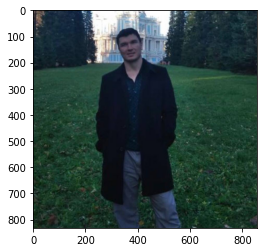

In [7]:
img = cv2.imread('/home/nikolay/Downloads/Telegram Desktop/IMG_20211115_133957_770.jpg')
faces = faceAnalizer.get_faces(img)
face = faces[0]
points = np.append(face['kps'][:,0], face['kps'][:,1])
XFrontal, YFrontal = faceAnalizer.find_pose(points)
landmarks68 = faceAnalizer.get_68_points(img, face)
landmarks29 = faceAnalizer.get_29_anfas_points(img, face)
anfas_glazomer = calculate_features_anfas(landmarks29, landmarks68, img, printout=False,
                                          Anfas_BrowForm_model=browFrom_model)

g,a = faceAnalizer.get_gender_age(img, face)
print('gender',g,'age',a)
plt.imshow(img[:,:,[2,1,0]]);
anfas_glazomer

In [27]:
anfas_glazomer['feature_cat'].keys()

dict_keys(['Асимметрия челюсти', 'Высота бровей', 'Наклон глаз', 'Полнота верхней губы', 'Полнота нижней губы', 'Асимметрия размера глаз', 'Ширина посадки глаз', 'Скулы', 'Форма головы', 'Верхнее веко', 'Асимметрия брови', 'Наклон бровей', 'Размер рта', 'Асимметрия наклона глаз', 'Асимметрия носа', 'Размер глаз', 'Оттопыренность ушей', 'Ширина челюсти', 'Уголки рта', 'Форма бровей'])

gender 1 age 39


{'api_result': {11: 42,
  20: 80,
  72: 241,
  37: 131,
  19: 76,
  6: 22,
  24: 306,
  4: 16,
  15: 55,
  39: 143,
  17: 67,
  2: 6,
  3: 12,
  36: 127},
 'feature_values': {'Доминантность губ': -7.902465612585296,
  'Наклон носа': 15.100130980772546,
  'Профиль': 30.268935333805786,
  'Скос лба': 20.10967579476943,
  'Длина носа': 107.27453138025751,
  'Выступ подбородка': 0.9748232376180681,
  'Впалость переносицы': 10.046145940340775,
  'Угол челюсти': 28.661169491877622,
  'Высота желобка': 63.15527425657324,
  'Размер ушей': 84.76502248268301,
  'Высота носа': 447.4656389837998,
  'Тяжесть челюсти': 6.546264263340955,
  'Выдвинутость челюсти': 8.992695188335968,
  'Надбровные дуги': [0.05659470334649086,
   0.6235371828079224,
   0.31986814737319946]},
 'feature_cat': {'Доминантность губ': 'Верх.доминанта',
  'Наклон носа': 'Вздернутый',
  'Профиль': 'Средний',
  'Скос лба': 'Средне-скошенный',
  'Длина носа': 'Средне-длинный',
  'Выступ подбородка': 'Средний по выступу',
  'Впал

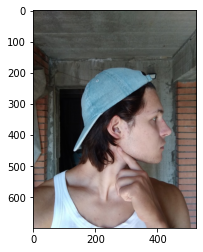

In [8]:
from merlin.glazomer.profile_glazomer import calculate_features_profile, EyeBrow_model
eyeBrow_model = EyeBrow_model()
img = cv2.imread('/home/nikolay/Downloads/Telegram Desktop/Kmm8AlRbOy4.jpg')
faces = faceAnalizer.get_faces(img)
face = faces[0]
points = np.append(face['kps'][:,0], face['kps'][:,1])
XFrontal, YFrontal = faceAnalizer.find_pose(points)
landmarks68 = faceAnalizer.get_68_points(img, face)
landmarks29 = faceAnalizer.get_29_anfas_points(img, face)
landmarks21 = faceAnalizer.get_21_profile_points(img, face)
profile_glazomer = calculate_features_profile(landmarks21,img,eyeBrow_model,False)

g,a = faceAnalizer.get_gender_age(img, face)
print('gender',g,'age',a)
plt.imshow(img[:,:,[2,1,0]]);
profile_glazomer

In [26]:
profile_glazomer['feature_cat'].keys()

dict_keys(['Доминантность губ', 'Наклон носа', 'Профиль', 'Скос лба', 'Длина носа', 'Выступ подбородка', 'Впалость переносицы', 'Угол челюсти', 'Высота желобка', 'Размер ушей', 'Высота носа', 'Тяжесть челюсти', 'Выдвинутость челюсти', 'Надбровные дуги'])

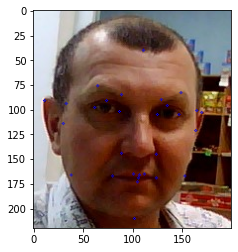

In [43]:
img = cv2.imread('/home/nikolay/workspace/mfo/data/total/60619-28012_ada2db0b-8111-11e5-84de-f01fafe92f9d/58323bf5-37f3-450e-a76d-38cd0d4e3719.jpg')
points = np.loadtxt('/home/nikolay/workspace/mfo/data/total/60619-28012_ada2db0b-8111-11e5-84de-f01fafe92f9d/58323bf5-37f3-450e-a76d-38cd0d4e3719.29pts')


def draw_landmarks(img, landmarks):
    dimg = img.copy()
    lmk = landmarks.astype(np.int)
    for l in range(lmk.shape[0]):
        color = (255, 0, 0)
        cv2.circle(dimg, (lmk[l][0], lmk[l][1]), 1, (255, 0, 0), 1)
    return dimg

dimg = draw_landmarks(img, points)
plt.imshow(dimg[80:300, 200:400, [2,1,0]])

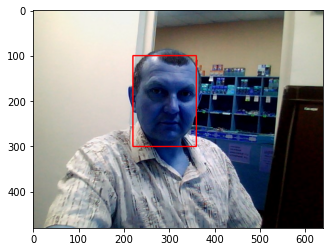

In [33]:
import cv2
img = cv2.imread('/home/nikolay/workspace/mfo/data/total/60619-28012_ada2db0b-8111-11e5-84de-f01fafe92f9d/58323bf5-37f3-450e-a76d-38cd0d4e3719.jpg')

x,y,x2,y2 = 220,100,360,300
profile_bbox = [x,y,x2,y2]
# cv2.rectangle(img, (x, y), (x2, y2), (255,0,0), 2)
cv2.rectangle(img, (profile_bbox[0], profile_bbox[1]), (profile_bbox[2], profile_bbox[3]), (255,0,0), 2)
plt.imshow(img)

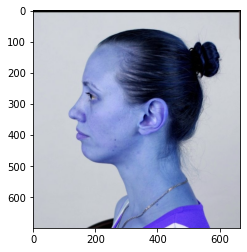

(0.9023346659916031, -120.39241, 12.888367)

In [60]:
img = cv2.imread('/home/nikolay/Downloads/Telegram Desktop/0ae0b3fc-8061-11ea-a5fd-00163eed70f7_profile.jpg')

faces = faceAnalizer.get_faces(img)
face = faces[0]
points = np.append(face['kps'][:,0], face['kps'][:,1])
plt.imshow(img)
plt.show()
faceAnalizer.find_pose(points)
faceAnalizer.find_pitch(points), faceAnalizer.find_yaw(points), faceAnalizer.find_roll(points)

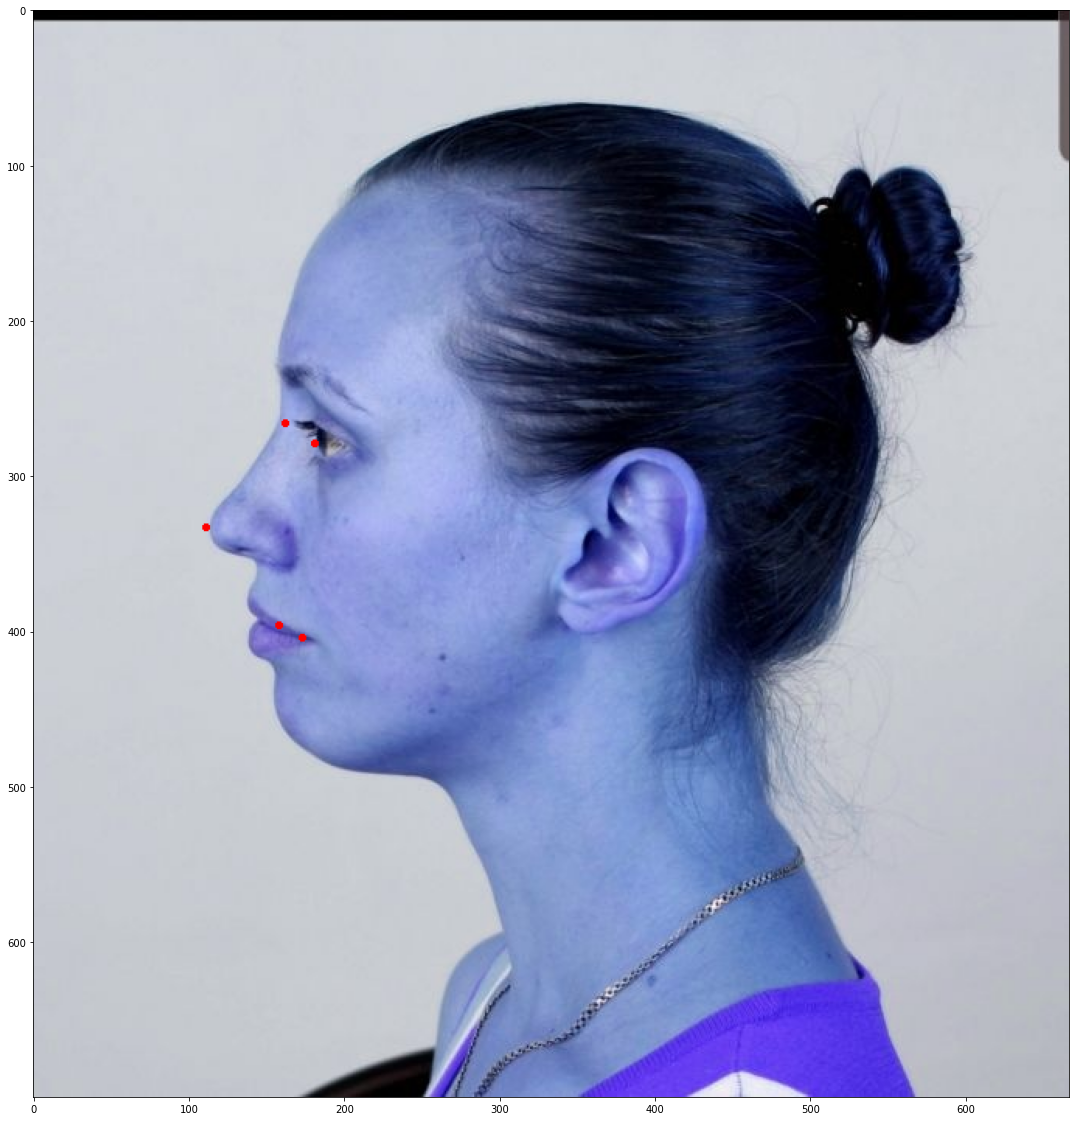

In [58]:
imgg = faceAnalizer.draw_landmarks(img, face['kps'])
plt.figure(figsize=(20,20))
plt.imshow(imgg)